# Supervised learning: diverse classifiers

*   Section 1. Baseline logistic regression.
*   Section 2. ML classifiers.



The scripts include more than the seven classifiers we discussed in the class.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
## import the sklearn models
# logistic regression
from sklearn.linear_model import LogisticRegression

# K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

# support vector machine
from sklearn.svm import SVC, LinearSVC
# SVC: support vector classification (using kernel methods)

# decision tree
from sklearn.tree import DecisionTreeClassifier

# ensemble methods, e.g., random forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# naive Bayesian
from sklearn.naive_bayes import GaussianNB

# discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# neural network
from sklearn.neural_network import MLPClassifier


In [ ]:
# define the mounting point on Google drive
from google.colab import drive
drive.mount('/content/drive/')

# Switch to Colab Notebooks.
# Mac system
# !cd '/content/drive/My Drive/Colab Notebooks/data/'
# Windows system
%cd /content/drive/My Drive/Colab Notebooks/data/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# read data
df = pd.read_csv('Florida_ct.csv', index_col = 0)

In [ ]:
df.head()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930


In [ ]:
# preprocessing
# expensive vs. non-expensive properties as the binary variable
# threshold = 0.8
df['property_value_discrete'] = 1
df.loc[df['property_value_median'] < 200000, 'property_value_discrete'] = 0

## Section 1. Creating a baseline logistic regression in ML (lec08)

In [ ]:
# assign the inputs and outputs
var_list = ['inc_median_household',
            'households',
            'travel_driving_ratio', 'travel_pt_ratio', 'travel_taxi_ratio', 'travel_work_home_ratio',
            'edu_higher_edu_ratio',
            'household_size_avg',
            'vacancy_ratio', 'rent_median',
            'race_white_ratio',
            'race_asian_ratio'
            ]

y = df['property_value_discrete']
X = df[var_list]
# X = sm.add_constant(X)

# change the data format
X = X.values
y = y.values


In [ ]:
# creating the training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [ ]:
# initialize logistic regression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with training data only
logreg.fit(X_train, y_train)

# check the performance
train_predictions = logreg.predict(X_train)
acc = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.4%}".format(acc))

test_predictions = logreg.predict(X_test)
acc = accuracy_score(y_test, test_predictions)
print("Testing Accuracy: {:.4%}".format(acc))


Training Accuracy: 78.7579%
Testing Accuracy: 79.0168%


## Section 2. ML classifiers

In [ ]:
# check the performance for all the classifiers.
classifiers = [
    LogisticRegression(random_state=16),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MLPClassifier(alpha=1e-10, hidden_layer_sizes=(20, 2), random_state=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Train Accuracy", "Train Log Loss", "Test Accuracy", "Test Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    # training
    train_predictions = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_predictions)
    print("Training Accuracy: {:.4%}".format(train_acc))

    train_predictions = clf.predict_proba(X_train)
    train_ll = log_loss(y_train, train_predictions)
    print("Training Log Loss: {}".format(train_ll))

    # testing
    test_predictions = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_predictions)
    print("Testing Accuracy: {:.4%}".format(test_acc))

    test_predictions = clf.predict_proba(X_test)
    test_ll = log_loss(y_test, test_predictions)
    print("Testing Log Loss: {}".format(test_ll))

    log_entry = pd.DataFrame([[name, train_acc*100, train_ll, test_acc*100, test_ll]], columns=log_cols)
    log = pd.concat([log, log_entry])


LogisticRegression
****Results****
Training Accuracy: 78.7579%
Training Log Loss: 0.46555645605209717
Testing Accuracy: 79.0168%
Testing Log Loss: 0.4796548119451627
KNeighborsClassifier
****Results****
Training Accuracy: 87.9988%
Training Log Loss: 0.2339124335943578
Testing Accuracy: 76.7386%
Testing Log Loss: 3.1201659216850306
SVC
****Results****
Training Accuracy: 81.2481%
Training Log Loss: 0.40968611537859256
Testing Accuracy: 79.2566%
Testing Log Loss: 0.4408109236588747
DecisionTreeClassifier
****Results****
Training Accuracy: 100.0000%
Training Log Loss: 2.2204460492503136e-16
Testing Accuracy: 77.5779%
Testing Log Loss: 8.081730436168954
RandomForestClassifier
****Results****
Training Accuracy: 100.0000%
Training Log Loss: 0.08776189756794717
Testing Accuracy: 83.9329%
Testing Log Loss: 0.33498327992798743
GaussianNB
****Results****
Training Accuracy: 49.4449%
Training Log Loss: 1.5705092455858793
Testing Accuracy: 49.7602%
Testing Log Loss: 1.6168779832004105
MLPClassifier


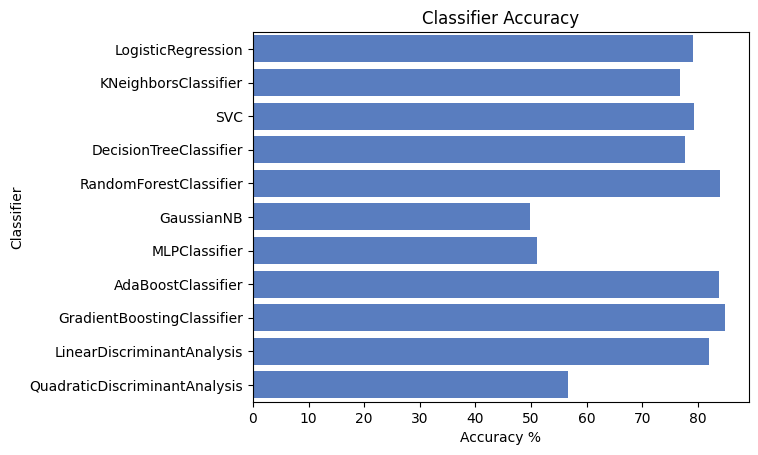

In [ ]:
# Visualize the performance.
sns.set_color_codes("muted")
sns.barplot(x='Test Accuracy', y='Classifier', data=log, color="b")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

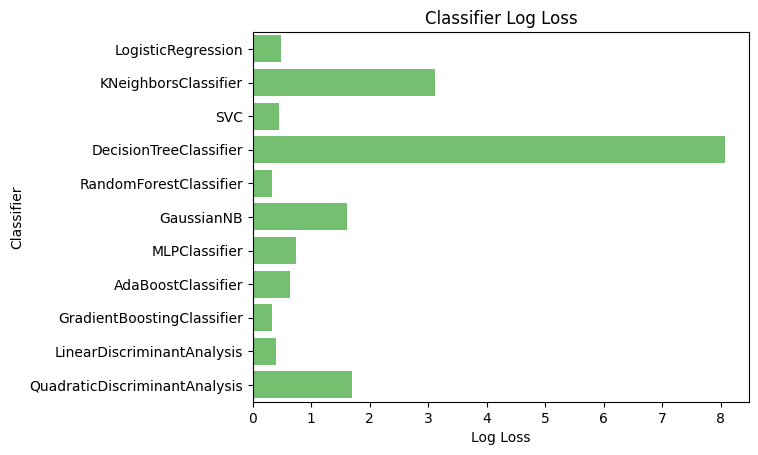

In [ ]:
# Visualize the performance.
sns.set_color_codes("muted")
sns.barplot(x='Test Log Loss', y='Classifier', data=log, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()




*   The performance of the logistic regression is not bad, although usually it is not the highest.
*   The ensemble methods, e.g. RF, achieve the highest predictive performance.





## **Exercise.** Create a dummy variable to represent the auto vs. non-auto census tracts by using a threshold value. Then compare the performance of the ML classifiers.  